In [1]:
import torch, os, pickle, time
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../tigress/cj1223/gmdata/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,35]+list(range(37,60)))

In [2]:
os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

['vlarge_all_multit_z0.0_standard_stand',
 'medium_beforeafter',
 'medium_redshift_50_all',
 'vlarge_all_multit_z0.5_power_quant',
 'vlarge_all_multit_z0.0_None',
 'vlarge_all_multit_z2.0_standard_quant',
 'medium_smass_z1.0_standard',
 'vlarge_all_multisimple_z0.0_quantile_quant',
 'test_onlyhmass_smass',
 'medium_redshift_80_all',
 'vlarge_all_final',
 'vlarge_all_multit_z1.0_standard_stand',
 'vlarge_all_multit_z1.0_power_quant',
 'medium_all_q_diffbeforeafter',
 'vlarge_redshift_85_all',
 'vlarge_all_multi_z0.5_quantile',
 'medium_all_smass',
 'medium_onlyhmass_smass',
 'vlarge_all_multi_z1.0_power',
 'vlarge_all_multit_z0.0_quantile_quant',
 'vlarge_all_multit_z0.0_standard_quant',
 'vlarge_all_multit_z0.5_quantile_quant',
 'vlarge_all_multit_z0.0_quantile_raw',
 'medium_scaleonly_smass',
 'vlarge_all_multi_z0.5_None',
 'vlarge_all_multit_z2.0_None',
 'vlarge_all_multit_z1.0_standard_quant',
 'vlarge_all_multit_z0.0_power_quant',
 'vlarge_all_multi_z0.5_standard',
 'vlarge_all_4t_

In [3]:
## need to work with vlarge_all_4t_z.. files 

In [4]:
## Should these be stacked in z?
## no

In [5]:
case='vlarge_all_4t_z0.0_None'

data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))

In [7]:
xs=[]
ys=[]
ls=[]
for d in data[:int(len(data)*0.8)]:
    xs.append(d.x.numpy())
    ys.append(d.y.numpy())
    ls.append(len(d.x.numpy()))
xs=np.vstack(xs)
# xs[:,40]=np.log10(xs[:,40])
ys=np.vstack(ys)
ls=np.array(ls)
splits=np.cumsum(ls)

In [8]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')

In [9]:
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')        

100%|█████████████████████████████████████████████████████████████████| 43/43 [00:16<00:00,  2.62it/s]


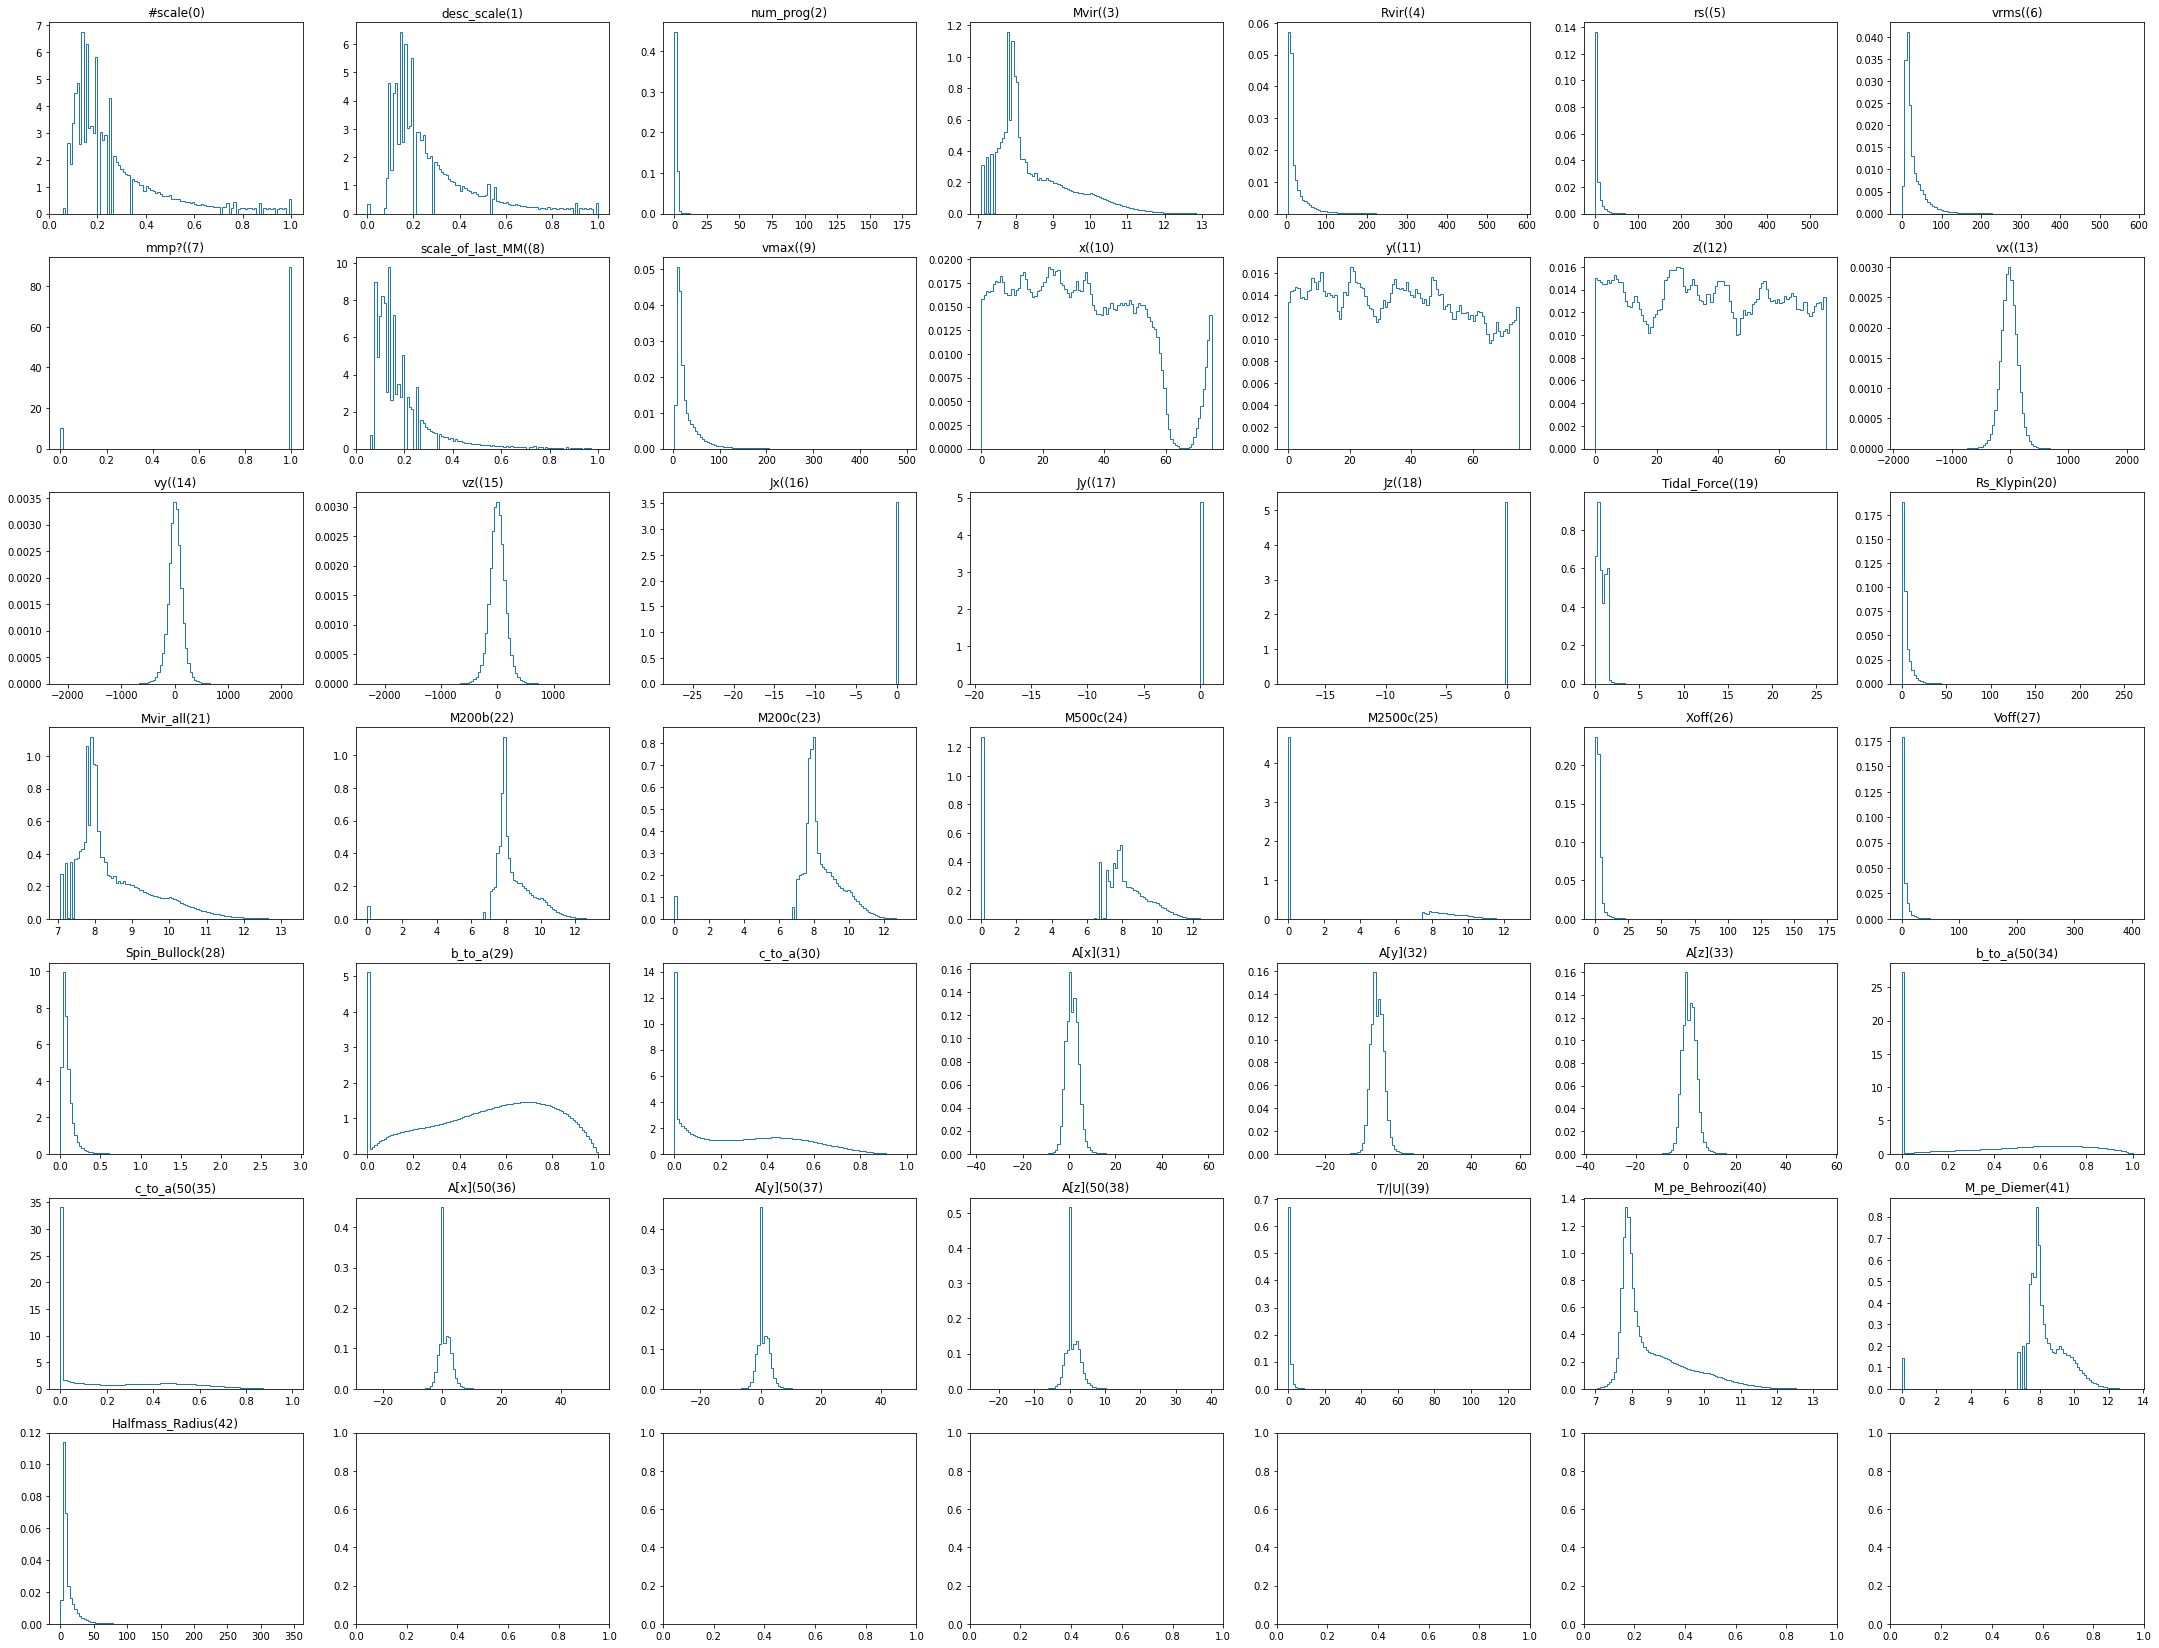

In [10]:

fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [11]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()
quantile={}
# xsQuant=np.copy(xs)
for i in tqdm(range(len(cols_h))):
    t=QuantileTransformer(output_distribution='normal').fit(xs[:,i].reshape(-1,1))
    new=t.transform(xs[:,i].reshape(-1,1))
#     xsQuant[:,i]=np.hstack(new)
    quantile[all_cols[i]]=t
    ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

100%|█████████████████████████████████████████████████████████████████| 43/43 [06:23<00:00,  8.93s/it]


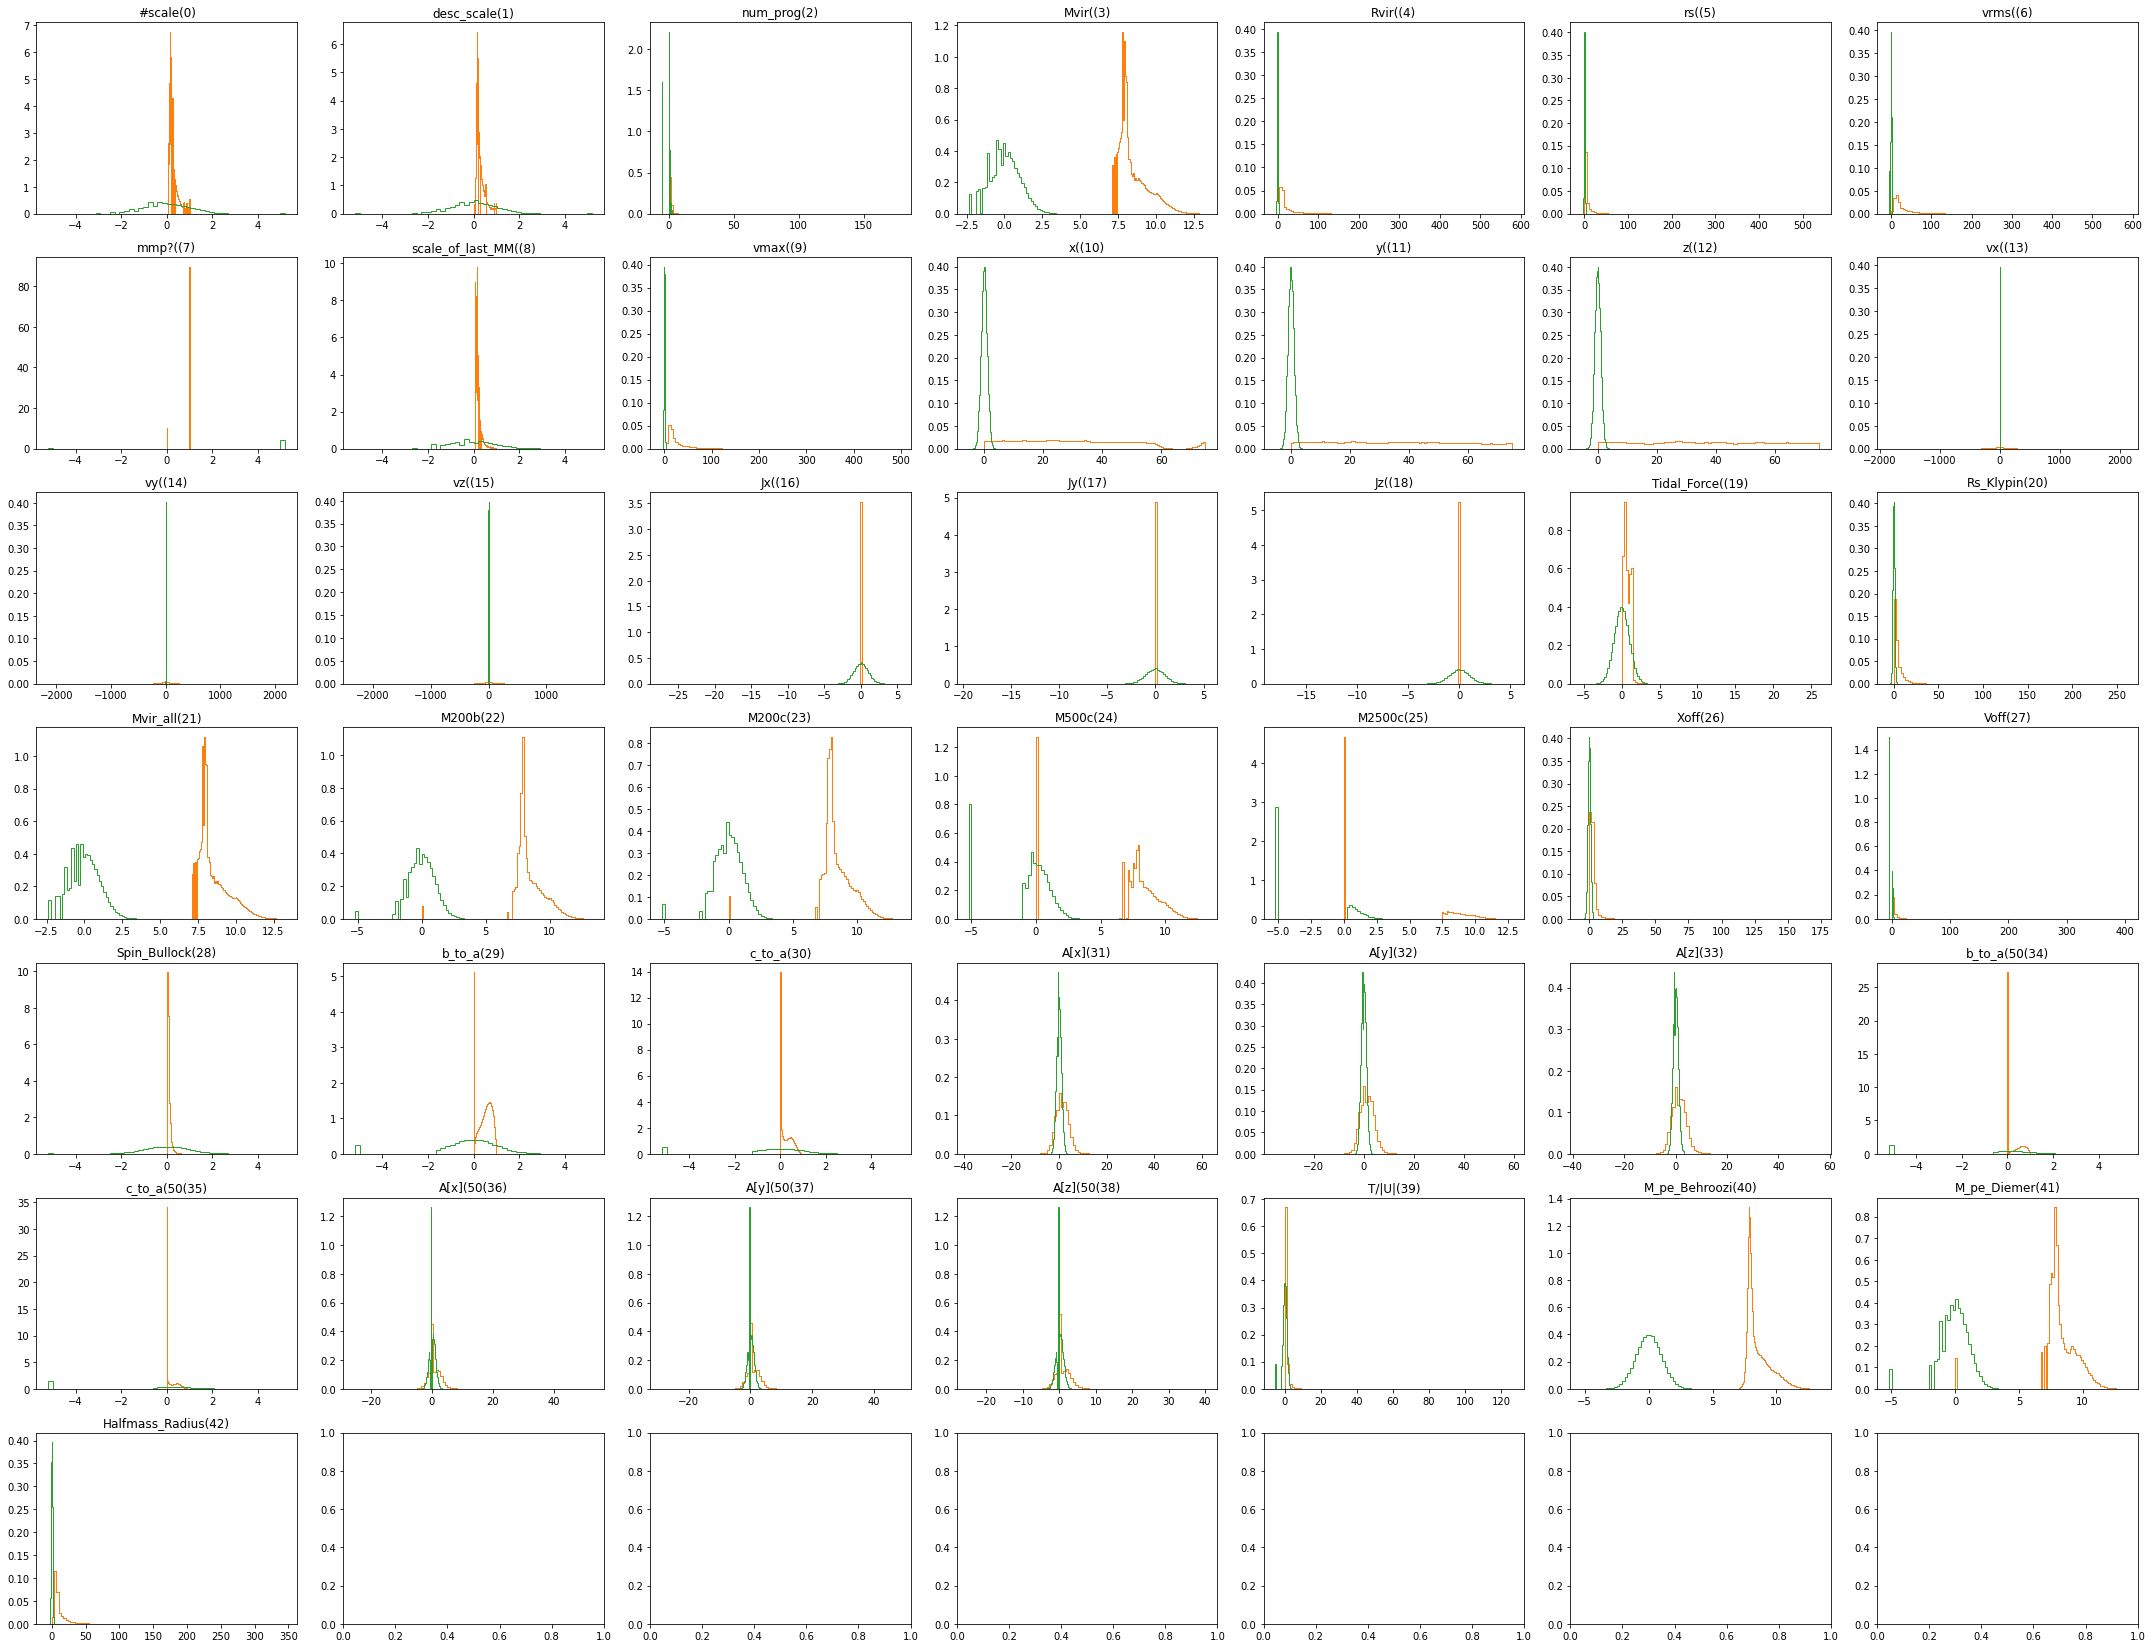

In [13]:
fig

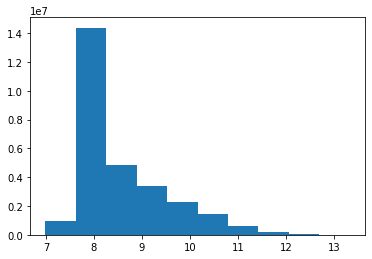

In [16]:
plt.hist(xs[:,40])
# plt.hist(xsQuant[:,40])
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/quantile_allfeat_4t.pkl")
with open(transform_path, 'wb') as handle:
    pickle.dump(quantile, handle)

100%|█████████████████████████████████████████████████████████████████| 43/43 [00:17<00:00,  2.42it/s]


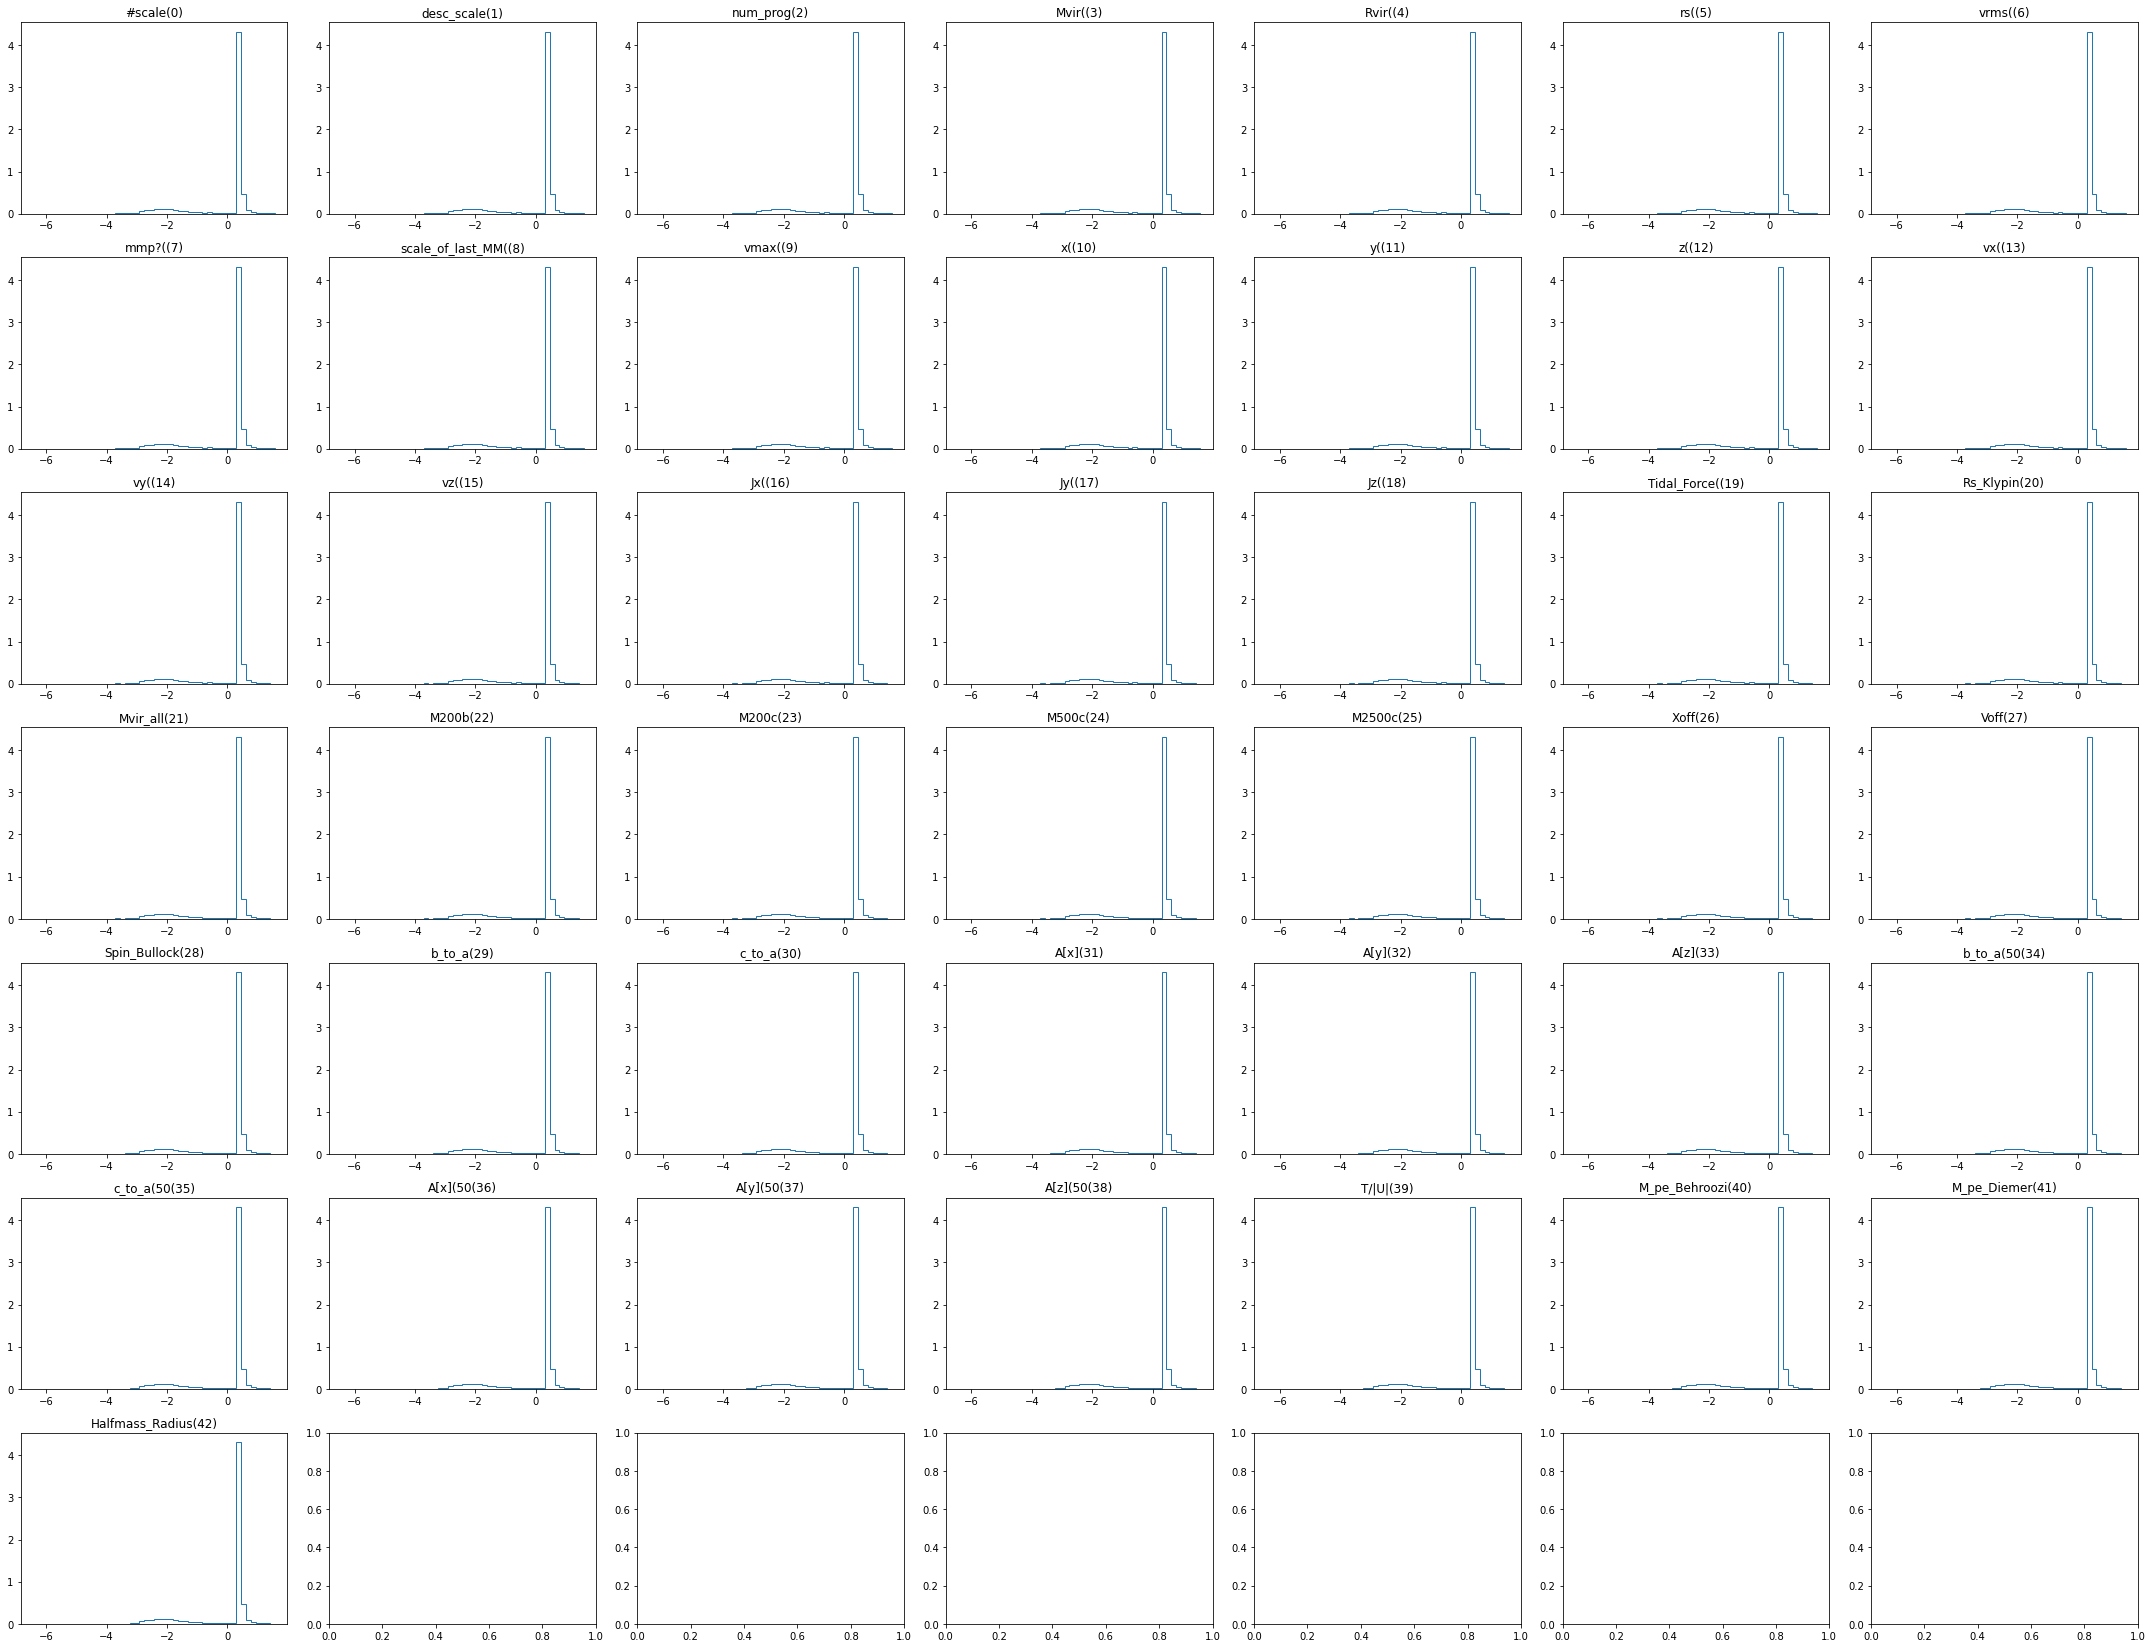

In [31]:
fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()
standard={}
power={}
n=1000
for i in tqdm(range(len(xs[0]))):
    t = StandardScaler().fit(xs[:,i].reshape(-1,1))
#     t = StandardScaler().fit(xs[:n,i].reshape(-1,1))
    
    standard[all_cols[i]]=t
#     new = np.hstack(t.transform(xs[:n,i].reshape(-1,1)))
#     new = np.hstack(t.transform(xs[:,i].reshape(-1,1)))
    
    ax[i].hist(new, bins=50, density=1, histtype='step')
    
#     t = PowerTransformer().fit(new.reshape(-1,1))
#     power[all_cols[i]]=t
# #     new = np.hstack(t.transform(new.reshape(-1,1)))

#     ax[i].hist(new, bins=50, density=1, histtype='step')
# #     ax[i].hist(xs[:n,i], bins=100, density=1, histtype='step');

    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [32]:
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/standard_allfeat_4t.pkl")
with open(transform_path, 'wb') as handle:
    pickle.dump(standard, handle)

# transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/power_allfeat_1.pkl")
# with open(transform_path, 'wb') as handle:
#     pickle.dump(power, handle)

## Fit the target-scalers

In [33]:
# targets
ex=f'../samout/{0}_{0}_{0}/galprop_0-99.dat'
pdc=pd.read_table(path+ex, skiprows=0, delimiter=',', nrows=41, header=None)
targets=[8,11,15,23]

In [34]:
colst=pdc.iloc[targets,0]
cols_t = []
for i, col in enumerate(colst):
    cols_t.append(col[4:]+f'({i})')        

100%|██████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 254.93it/s]


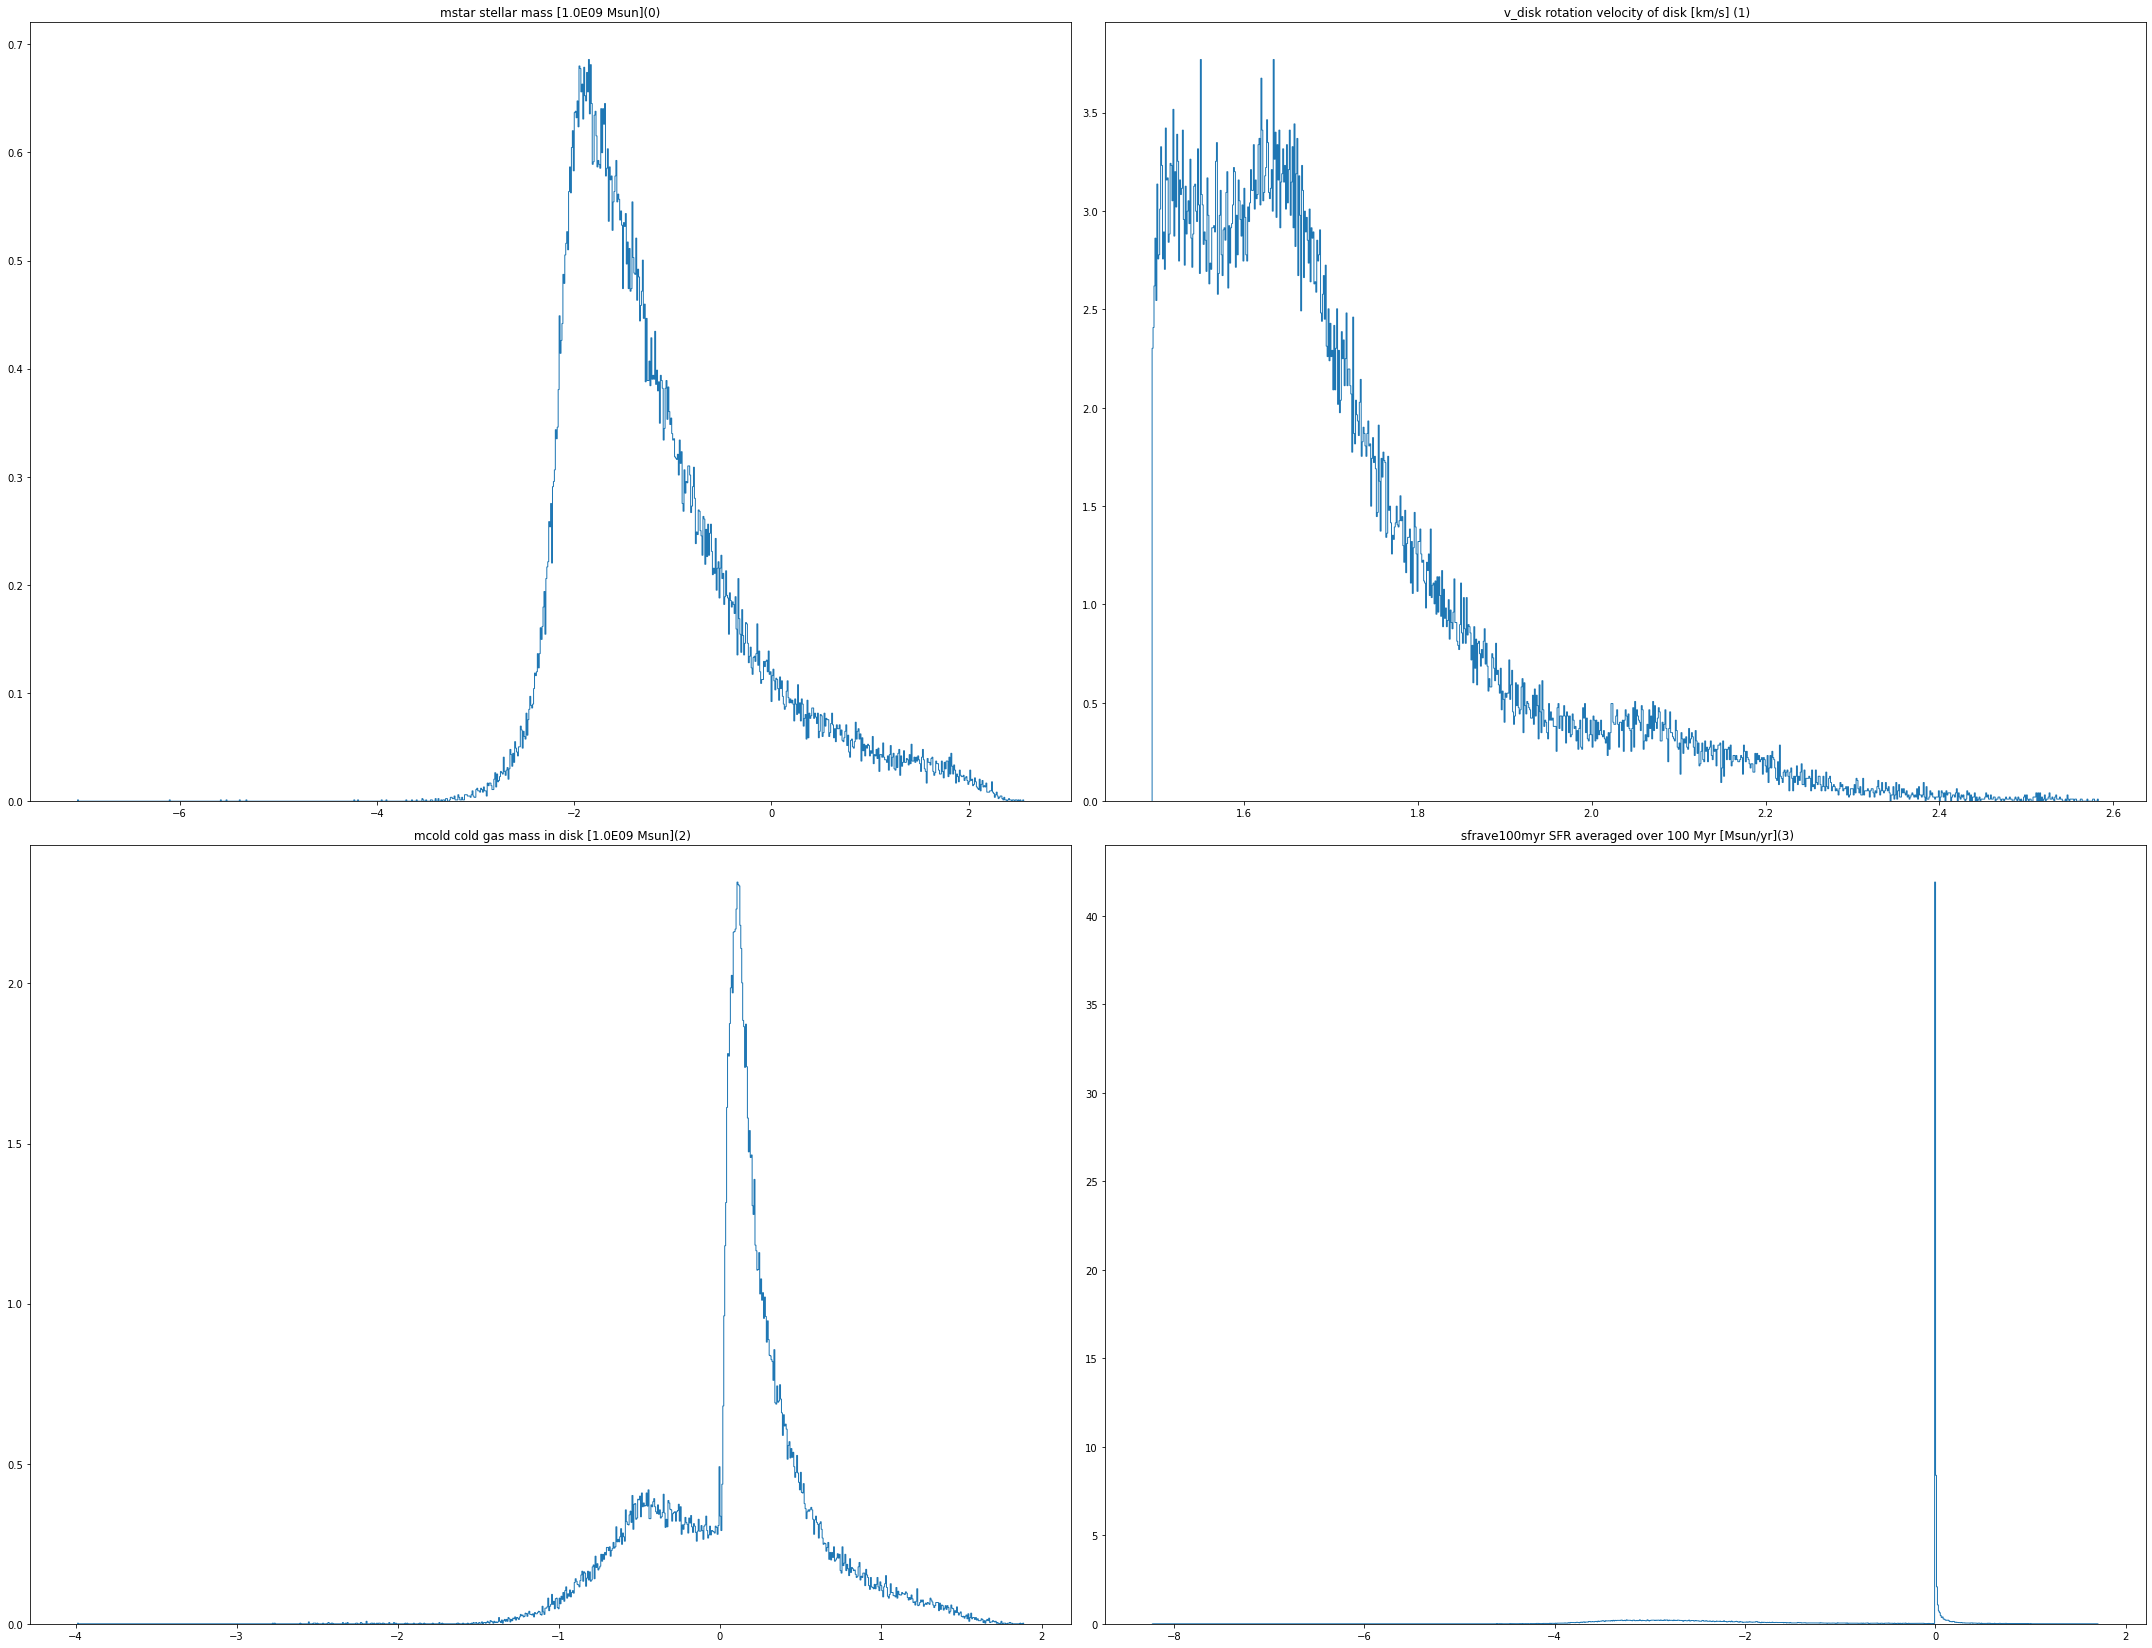

In [35]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_t))):
    ax[i].hist(ys[:,i], bins=1000, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.88it/s]


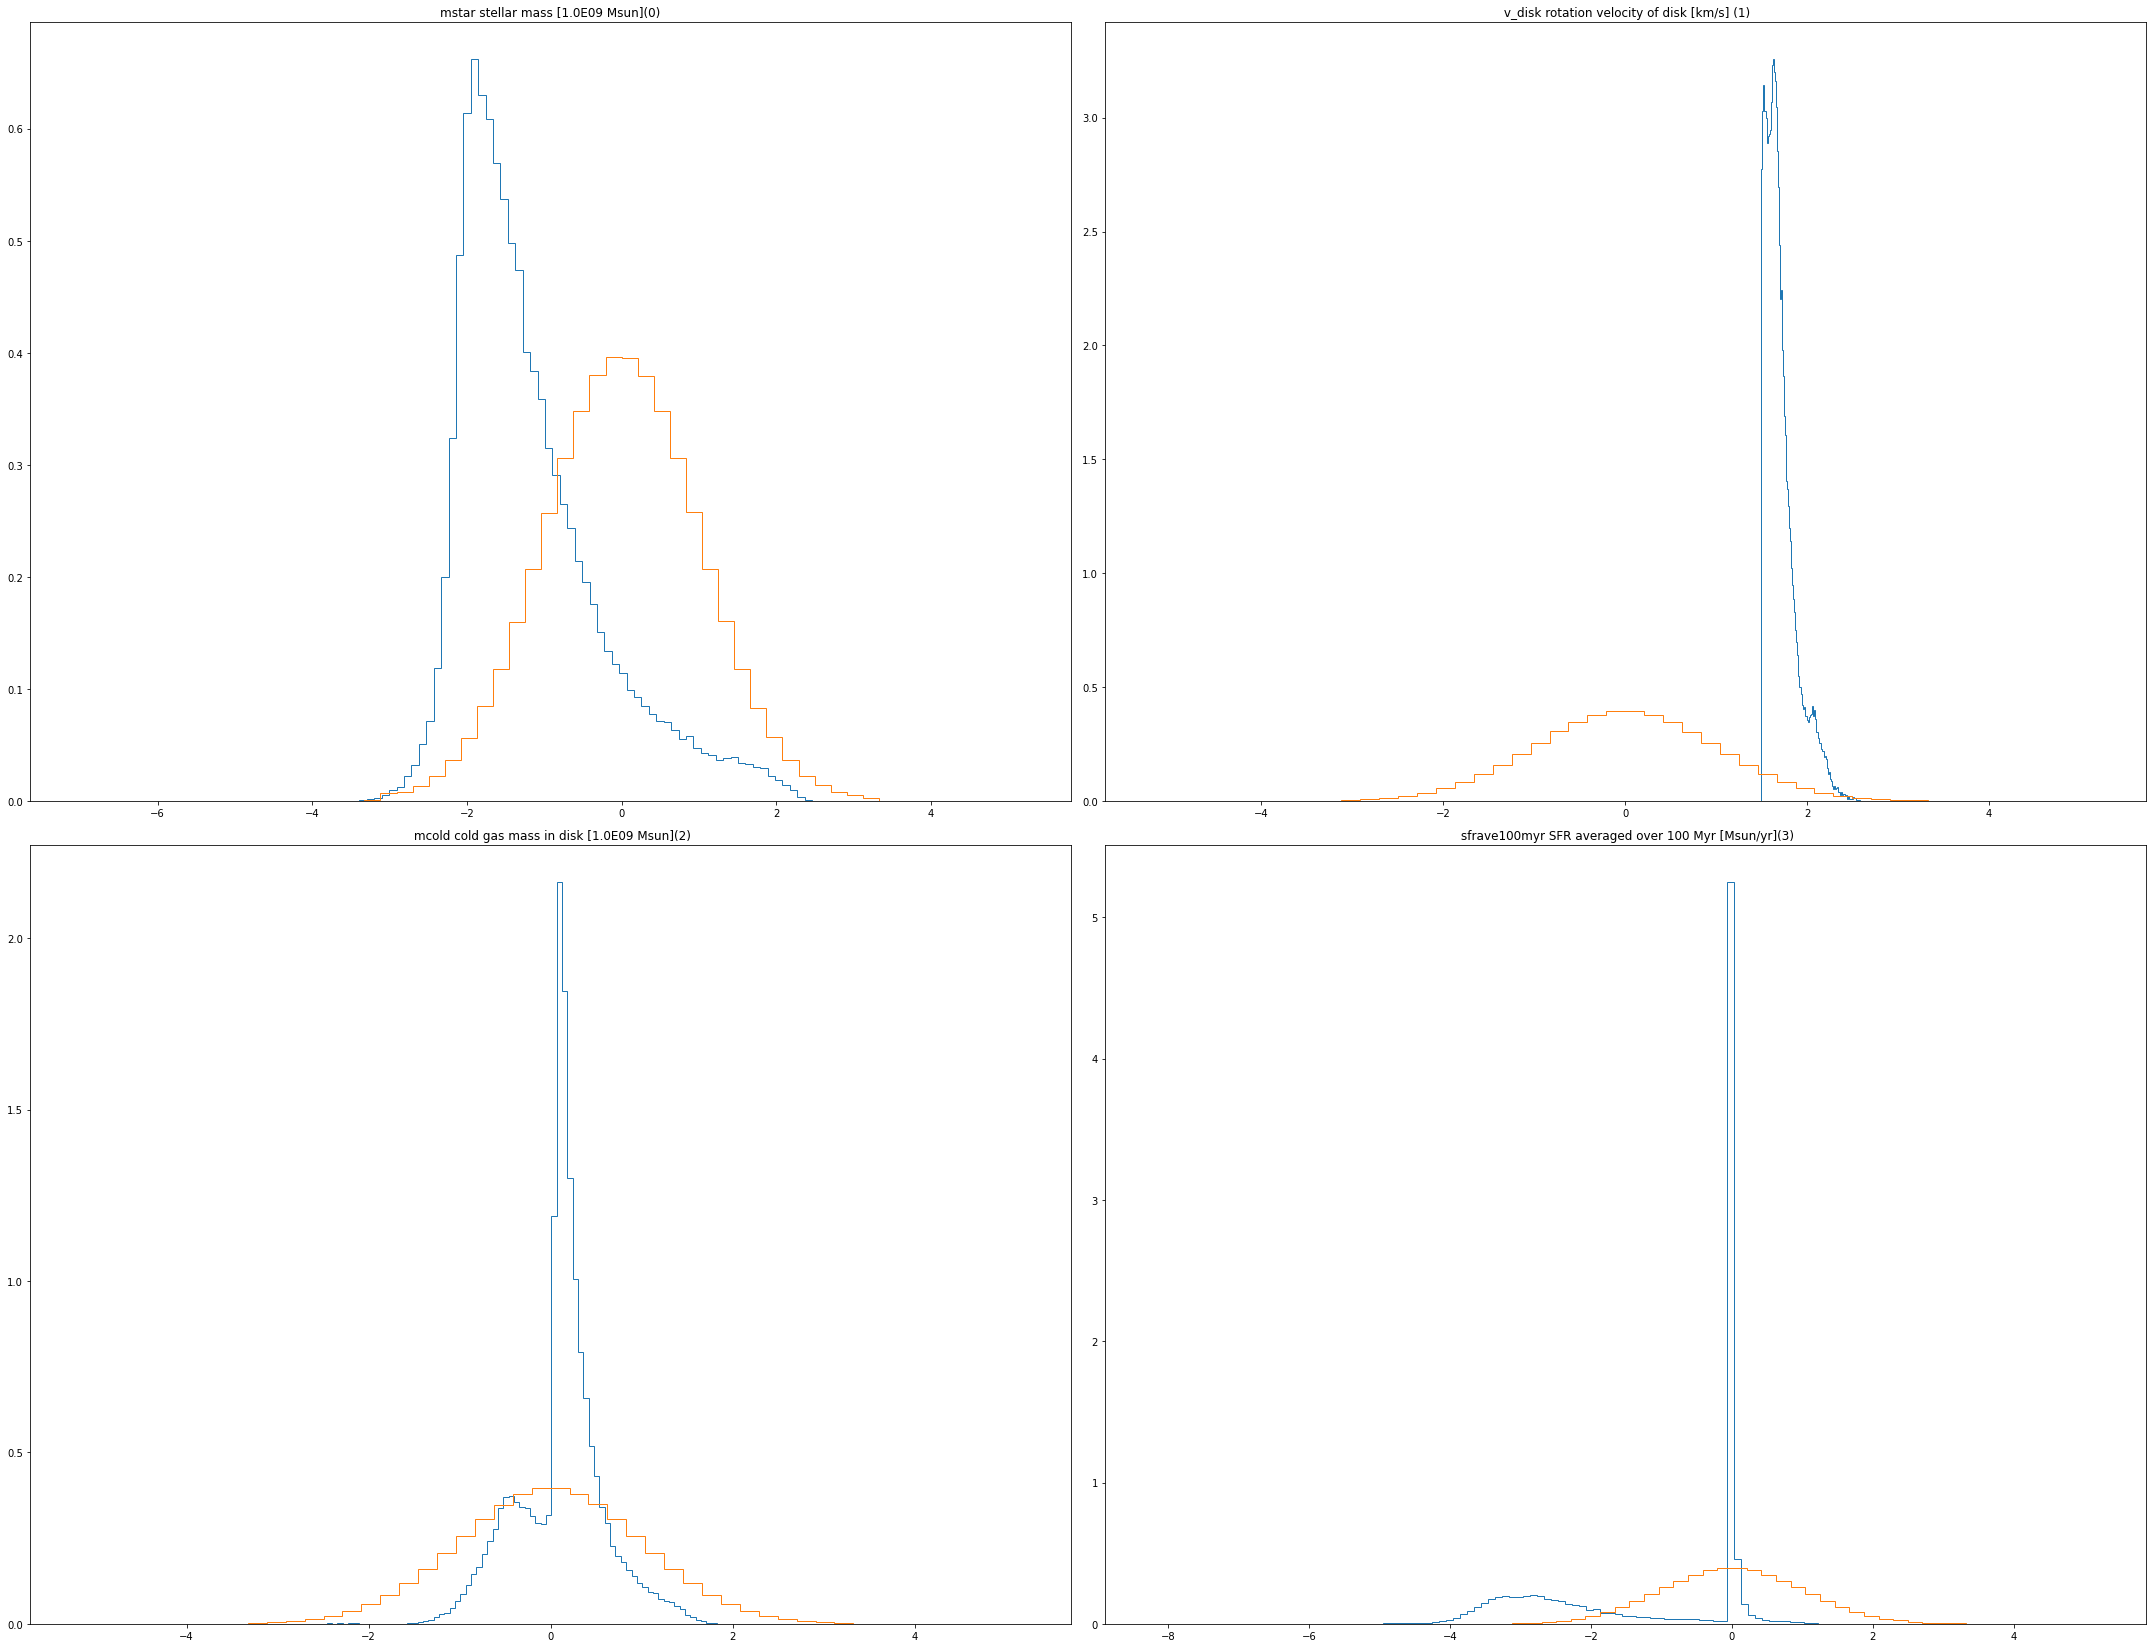

In [44]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(30,23))
ax=ax.flatten()
quantile={}
ysQuant=np.copy(ys)
for i in tqdm(range(len(cols_t))):
    t=QuantileTransformer(output_distribution='normal').fit(ys[:,i].reshape(-1,1))
    new=t.transform(ys[:,i].reshape(-1,1))
    ysQuant[:,i]=np.hstack(new)
    quantile[targets[i]]=t
    ax[i].hist(ys[:,i], bins=100, density=1, histtype='step');
    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

In [45]:
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/quantile_alltarg_4t.pkl")
with open(transform_path, 'wb') as handle:
    pickle.dump(quantile, handle)

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.74it/s]


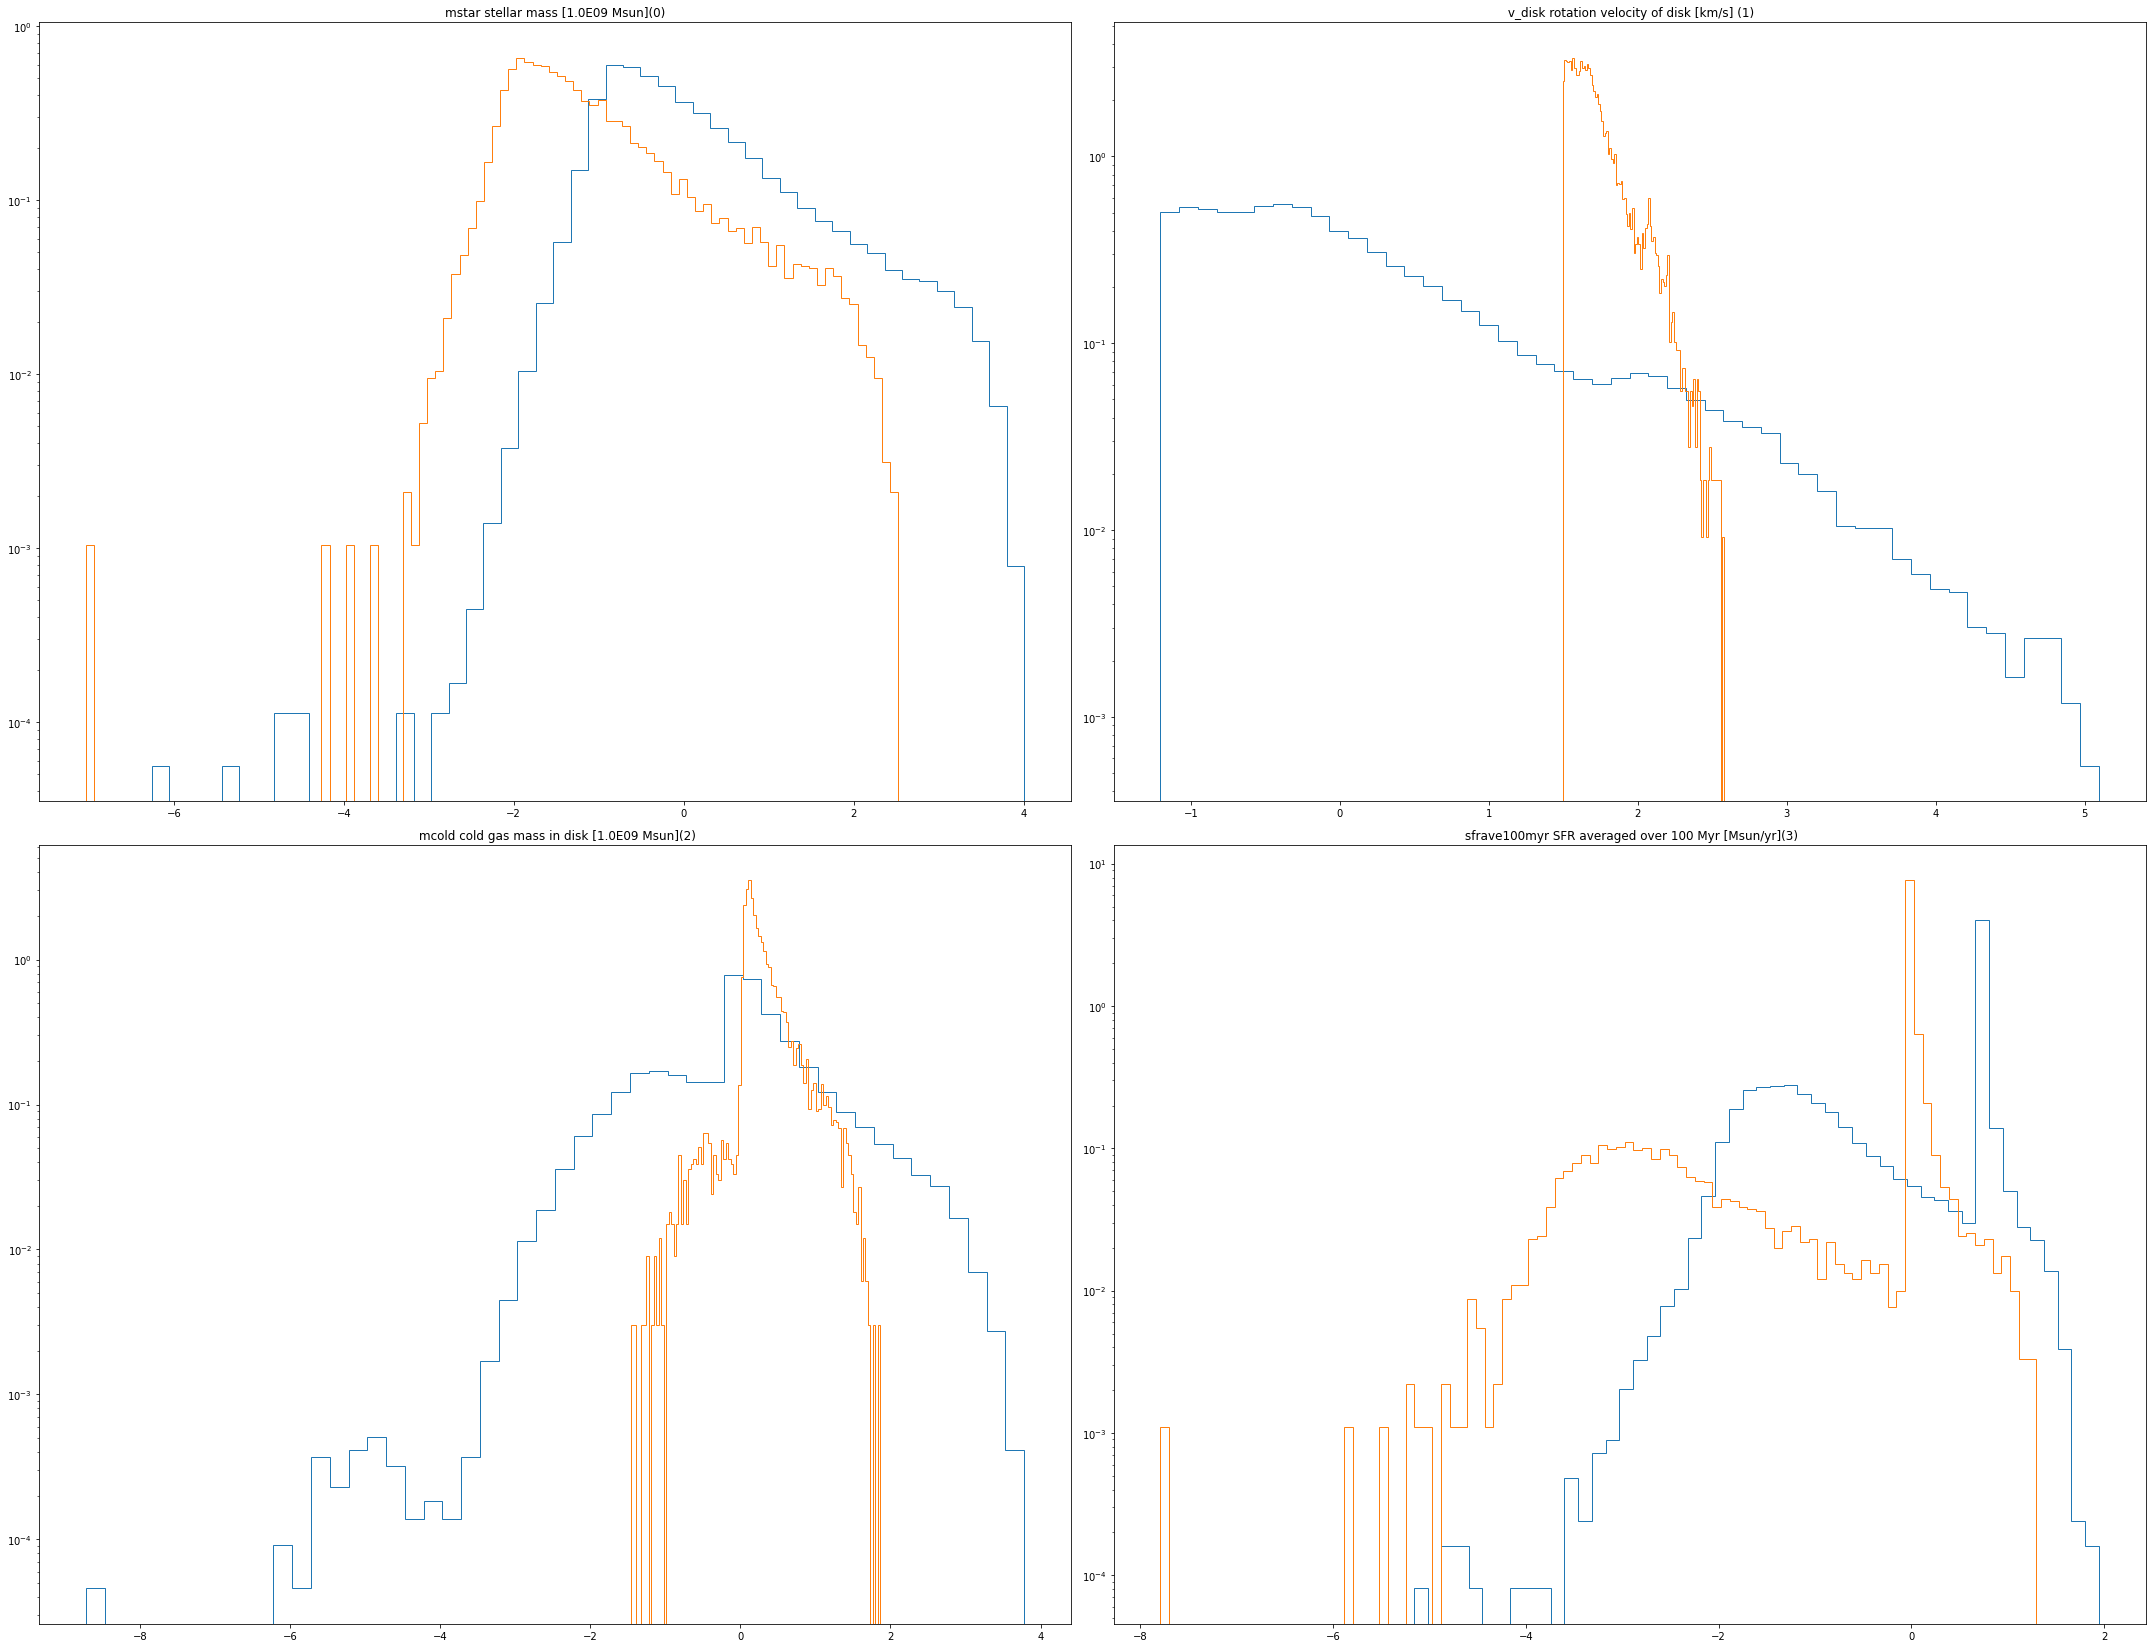

In [46]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(30,23))
ax=ax.flatten()
standard={}
power={}
n=10000
for i in tqdm(range(len(ys[0]))):
    t = StandardScaler().fit(ys[:,i].reshape(-1,1))
#     t = StandardScaler().fit(ys[:n,i].reshape(-1,1))
    standard[targets[i]]=t
    new = np.hstack(t.transform(ys[:,i].reshape(-1,1)))
#     new = np.hstack(t.transform(ys[:n,i].reshape(-1,1)))

    ax[i].hist(new, bins=50, density=1, histtype='step')
    
#     t = PowerTransformer().fit(new.reshape(-1,1))
#     power[all_cols[i]]=t
#     new = np.hstack(t.transform(new.reshape(-1,1)))

#     ax[i].hist(new, bins=50, density=1, histtype='step')
    ax[i].hist(ys[:n,i], bins=100, density=1, histtype='step');

    ax[i].set(title=cols_t[i], yscale='log')

fig.tight_layout()

In [47]:
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/standard_alltarg_4t.pkl")
with open(transform_path, 'wb') as handle:
    pickle.dump(standard, handle)

# transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/power_alltarg_1.pkl")
# with open(transform_path, 'wb') as handle:
#     pickle.dump(power, handle)